In [1]:
import os, sys
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
plt.style.use('ggplot')

for module in ['actions', 'models']:
    path = os.path.join(os.getcwd(), '..', module)
    sys.path.append(os.path.abspath(path))

from oracle import oracle
from inference import plot
from lstm_fixed import train_fixed
from load_data import load_data, prune

In [2]:
train_trials, eval_trials, test_trials = load_data(test_folders='eric')

# accuracies of the best models for each input type
model_accuracies = []

In [3]:
def get_top_models(model_names, accuracies, parameters, top_n=10):
     # get indicies for top models
    top_indicies = sorted(range(len(accuracies)), key=lambda i: accuracies[i])[-top_n:]

    # get names for top models
    top_models = [model_names[i] for i in top_indicies]

    # get accuracies for top models
    top_accuracies = [accuracies[i] for i in top_indicies]

    # get params for top models
    top_parameters = [parameters[i] for i in top_indicies]

    tops = (list(zip(top_accuracies, top_parameters)))
    pprint(tops)

    return top_models[-1], top_accuracies[-1]

### Oracle

In [4]:
# Aaronson Oracle Accuracies for windows 4, 5, 6 for reference
window_sizes = [3, 4, 5, 6, 7]
oracle_results = oracle(window_sizes, test_trials, cutoff=True, logging=False)

window_size = 0
oracle_accuracy = 0

for w in window_sizes:
    if oracle_results[w]['accuracy'] > oracle_accuracy:
        window_size = w
        oracle_accuracy = oracle_results[w]['accuracy']

print(window_size, round(oracle_accuracy, 2))

5 60.15


### Binary

In [5]:
train_trials_binary = prune(train_trials, 'binary')
eval_trials_binary = prune(eval_trials, 'binary')
test_trials_binary = prune(test_trials, 'binary')

In [6]:
models = []
parameters = []
accuracies = []
t_accuracies = []

for _ in range(50):
    model_name, params, accuracy, trial_accuracies = train_fixed(
        train_trials_binary, eval_trials_binary, test_trials_binary, 
        input_size=1, random='binary', logging=False
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)
    t_accuracies.append(trial_accuracies)

top_binary_model, top_binary_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_binary_acc)

[(63.72853884424596,
  {'batch_size': 80,
   'hidden_size': 32,
   'input_size': 1,
   'learning_rate': 0.0121,
   'num_epochs': 2,
   'num_stacked_layers': 2,
   'segment_length': 10}),
 (63.969714404344465,
  {'batch_size': 91,
   'hidden_size': 72,
   'input_size': 1,
   'learning_rate': 0.0043,
   'num_epochs': 2,
   'num_stacked_layers': 2,
   'segment_length': 7}),
 (64.16522672243244,
  {'batch_size': 124,
   'hidden_size': 41,
   'input_size': 1,
   'learning_rate': 0.0074,
   'num_epochs': 2,
   'num_stacked_layers': 2,
   'segment_length': 6}),
 (64.20360774863614,
  {'batch_size': 97,
   'hidden_size': 51,
   'input_size': 1,
   'learning_rate': 0.0096,
   'num_epochs': 2,
   'num_stacked_layers': 3,
   'segment_length': 8}),
 (64.30808957739953,
  {'batch_size': 115,
   'hidden_size': 65,
   'input_size': 1,
   'learning_rate': 0.0312,
   'num_epochs': 2,
   'num_stacked_layers': 1,
   'segment_length': 5}),
 (65.95365534108693,
  {'batch_size': 131,
   'hidden_size': 57,
 

(50, 13)


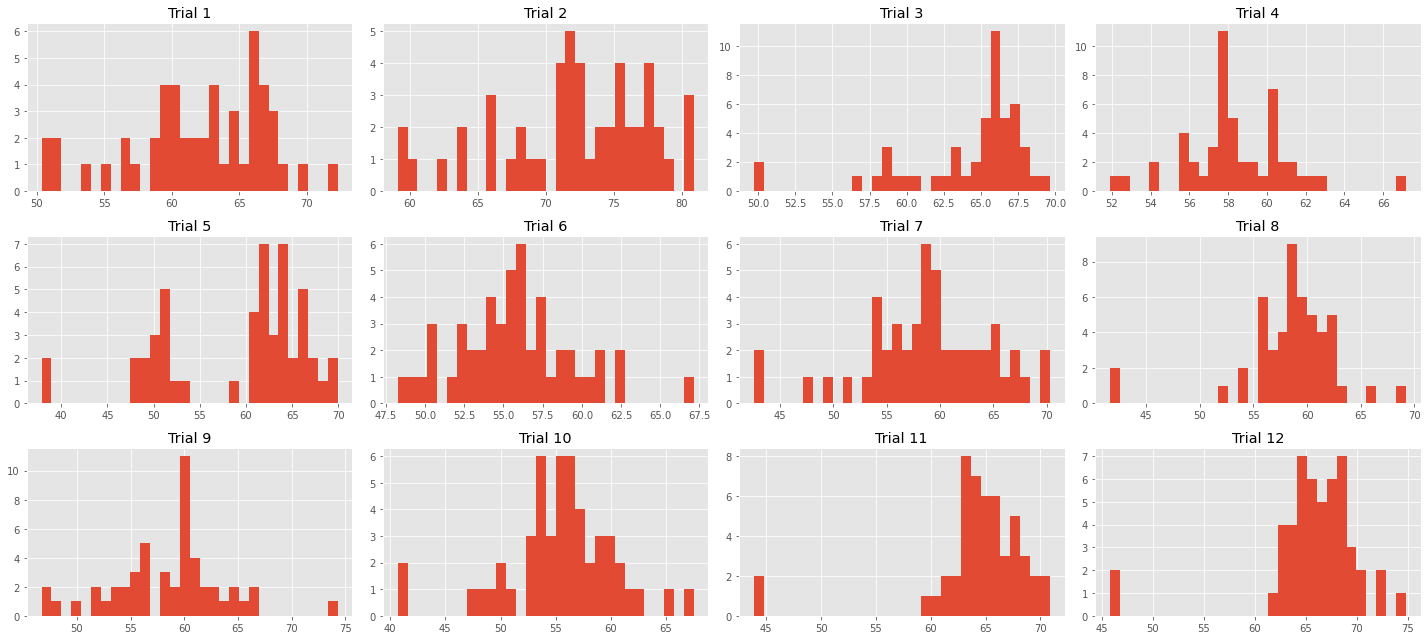

In [7]:
accs = np.array(t_accuracies)
print(accs.shape)

# plot histograms for each of the 13 columns of accs 

fig, axes = plt.subplots(3, 4, figsize=(20, 9))
axes = axes.flatten()  # Flatten the 2D array of axes

for i in range(12):
    axes[i].hist(accs[:, i], bins=30)
    axes[i].set_title(f'Trial {i+1}')
    axes[i].set_xlim(25, 75)

plt.tight_layout()
plt.show()

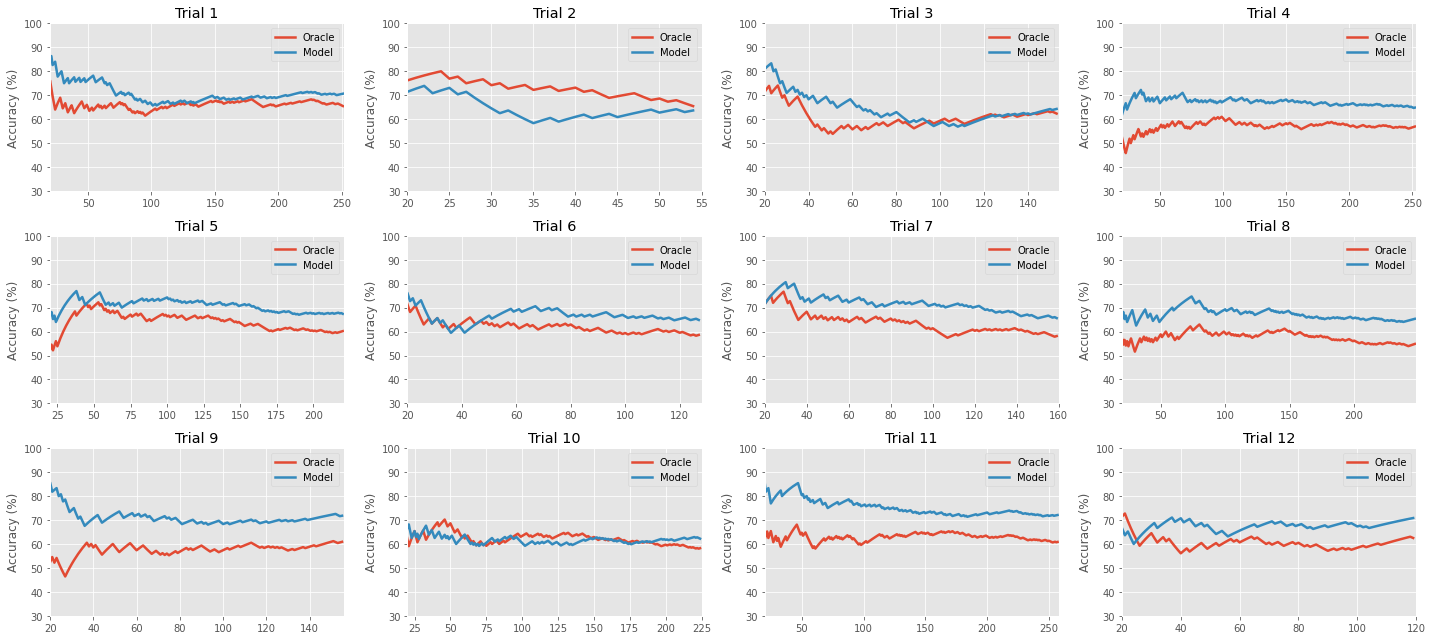

In [7]:
plot(test_trials, test_trials_binary, window_size, top_binary_model, cutoff=True)

### Delay

In [8]:
train_trials_delay = prune(train_trials, 'delay')
eval_trials_delay = prune(eval_trials, 'delay')
test_trials_delay = prune(test_trials, 'delay')

In [9]:
models = []
parameters = []
accuracies = []
t_accuracies1 = []

for _ in range(50):
    model_name, params, accuracy, trial_accuracies = train_fixed(
        train_trials_delay, eval_trials_delay, test_trials_delay, 
        input_size=2, random='delay', logging=False,
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)
    t_accuracies1.append(trial_accuracies)

top_delay_model, top_delay_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_delay_acc)

[(63.29877518716721,
  {'batch_size': 97,
   'hidden_size': 57,
   'input_size': 2,
   'learning_rate': 0.0041,
   'num_epochs': 6,
   'num_stacked_layers': 1,
   'segment_length': 11}),
 (63.352942173702225,
  {'batch_size': 125,
   'hidden_size': 51,
   'input_size': 2,
   'learning_rate': 0.0116,
   'num_epochs': 6,
   'num_stacked_layers': 1,
   'segment_length': 10}),
 (63.51305494016794,
  {'batch_size': 98,
   'hidden_size': 49,
   'input_size': 2,
   'learning_rate': 0.0033,
   'num_epochs': 6,
   'num_stacked_layers': 1,
   'segment_length': 10}),
 (63.69455846617373,
  {'batch_size': 124,
   'hidden_size': 47,
   'input_size': 2,
   'learning_rate': 0.0137,
   'num_epochs': 7,
   'num_stacked_layers': 2,
   'segment_length': 11}),
 (63.96687640731272,
  {'batch_size': 90,
   'hidden_size': 51,
   'input_size': 2,
   'learning_rate': 0.009,
   'num_epochs': 5,
   'num_stacked_layers': 1,
   'segment_length': 7}),
 (64.0221870256603,
  {'batch_size': 103,
   'hidden_size': 43,


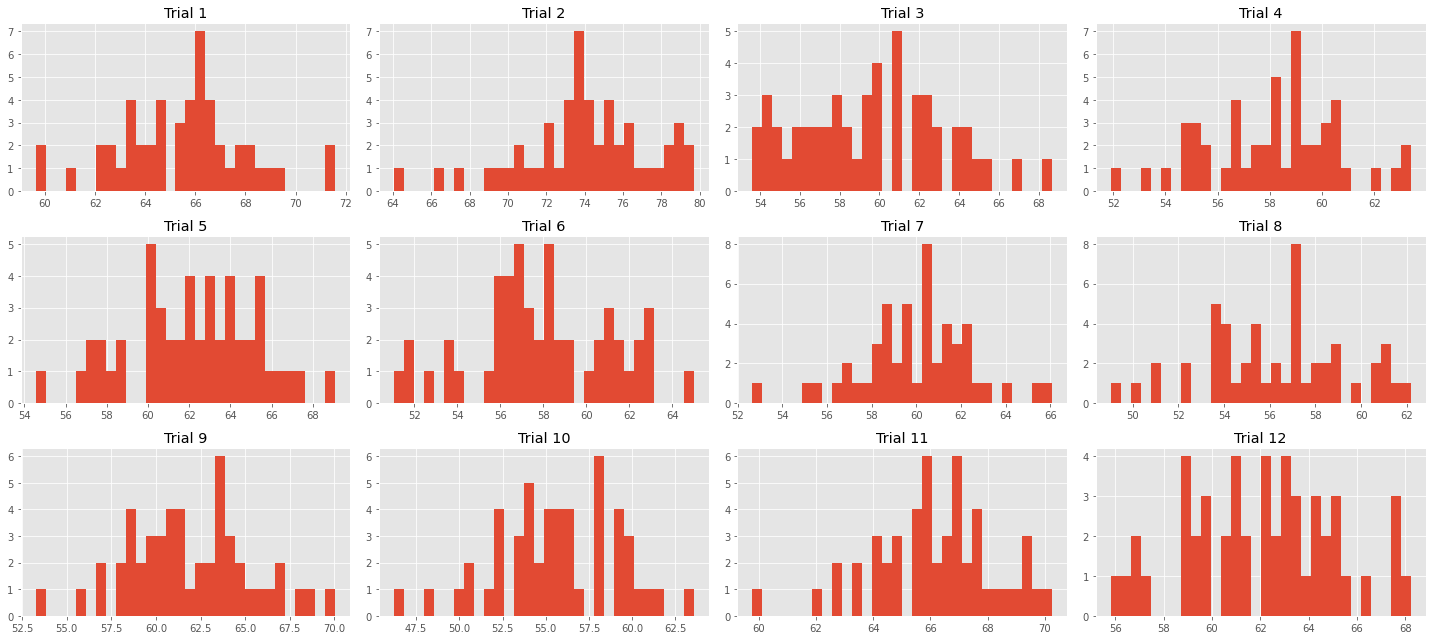

In [10]:
accs1 = np.array(t_accuracies1)

fig, axes = plt.subplots(3, 4, figsize=(20, 9))
axes = axes.flatten()  # Flatten the 2D array of axes

for i in range(12):
    axes[i].hist(accs1[:, i], bins=30)
    axes[i].set_title(f'Trial {i+1}')

plt.tight_layout()
plt.show()

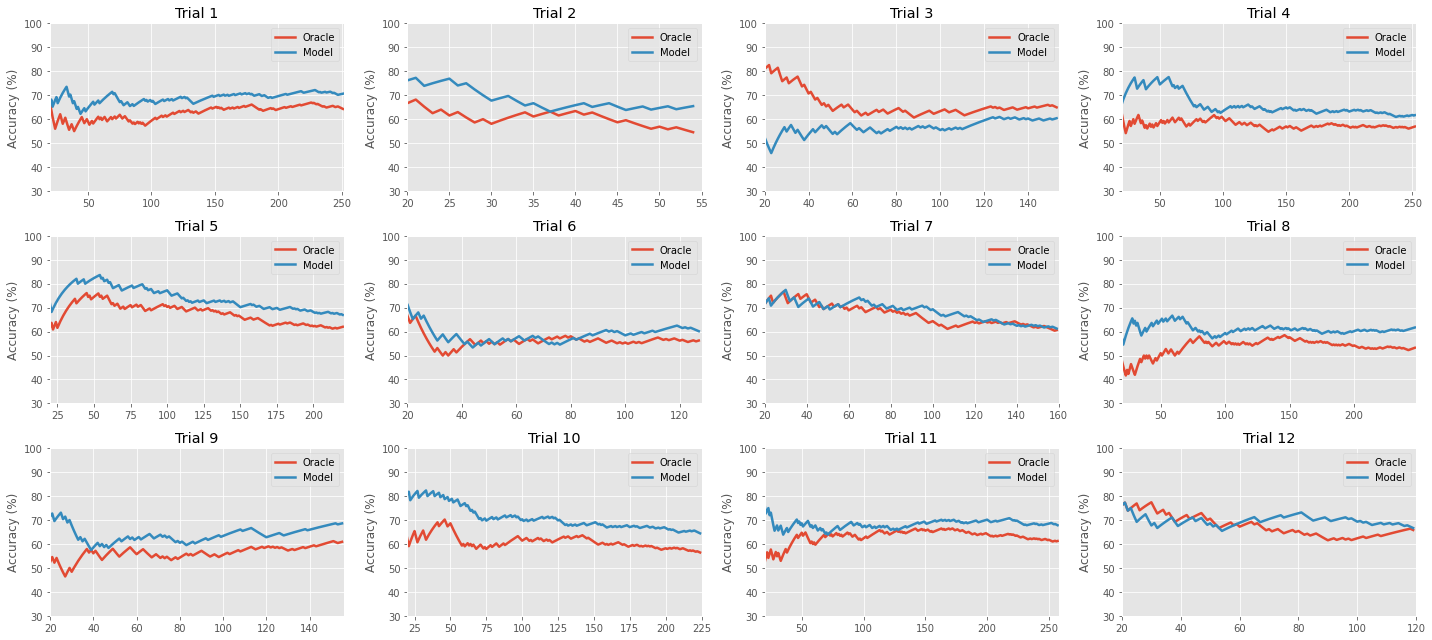

In [10]:
plot(test_trials, test_trials_delay, window_size, top_delay_model, cutoff=True)

### Pupils

In [11]:
train_trials_pupil = prune(train_trials, 'pupil')
eval_trials_pupil = prune(eval_trials, 'pupil')
test_trials_pupil = prune(test_trials, 'pupil')

In [12]:
models = []
parameters = []
accuracies = []
t_accuracies2 = []  

for _ in range(50):
    model_name, params, accuracy, trial_accuracies = train_fixed(
        train_trials_pupil, eval_trials_pupil, test_trials_pupil, 
        input_size=2, random='pupil', logging=False
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)
    t_accuracies2.append(trial_accuracies)

top_pupil_model, top_pupil_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_pupil_acc)

[(64.26289625490848,
  {'batch_size': 101,
   'hidden_size': 55,
   'input_size': 2,
   'learning_rate': 0.0106,
   'num_epochs': 7,
   'num_stacked_layers': 2,
   'segment_length': 9}),
 (64.27932643373285,
  {'batch_size': 135,
   'hidden_size': 49,
   'input_size': 2,
   'learning_rate': 0.004,
   'num_epochs': 5,
   'num_stacked_layers': 3,
   'segment_length': 13}),
 (64.31383002851827,
  {'batch_size': 120,
   'hidden_size': 63,
   'input_size': 2,
   'learning_rate': 0.0152,
   'num_epochs': 7,
   'num_stacked_layers': 3,
   'segment_length': 9}),
 (64.37711493449338,
  {'batch_size': 120,
   'hidden_size': 59,
   'input_size': 2,
   'learning_rate': 0.0049,
   'num_epochs': 5,
   'num_stacked_layers': 4,
   'segment_length': 9}),
 (64.5610570977036,
  {'batch_size': 113,
   'hidden_size': 58,
   'input_size': 2,
   'learning_rate': 0.004,
   'num_epochs': 7,
   'num_stacked_layers': 3,
   'segment_length': 8}),
 (64.654474748281,
  {'batch_size': 131,
   'hidden_size': 65,
   '

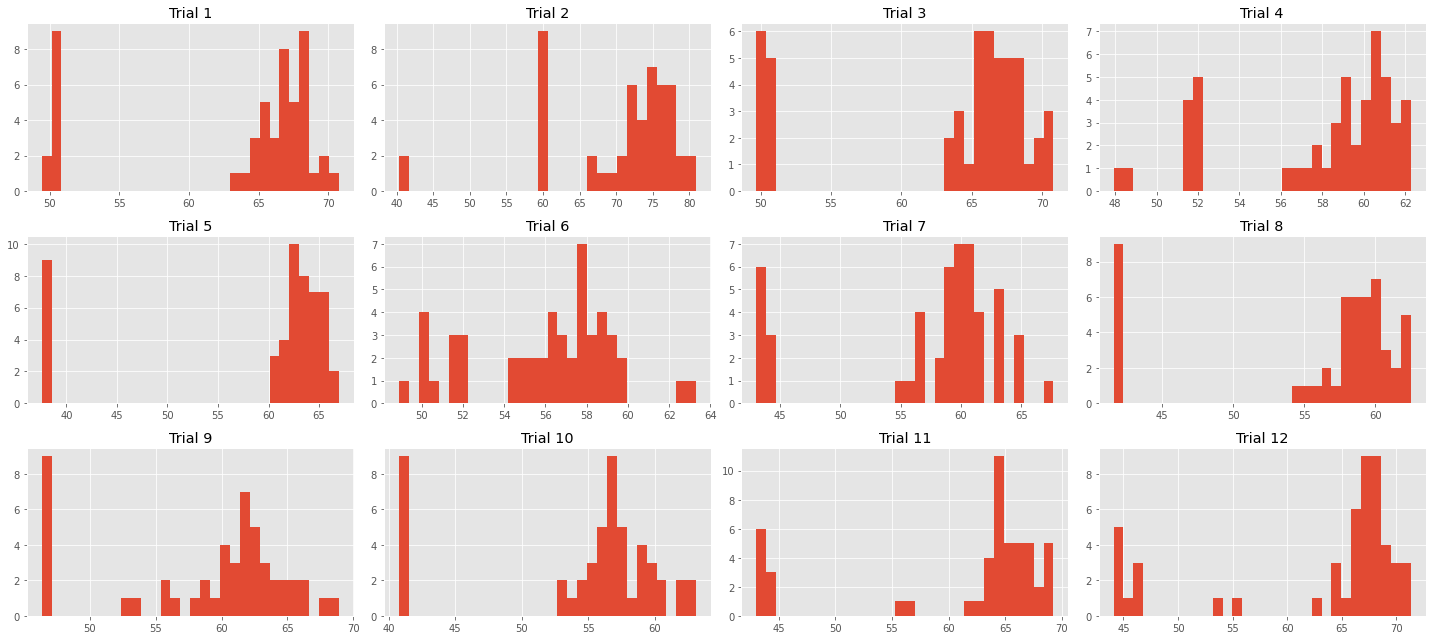

In [13]:
accs2 = np.array(t_accuracies2)

fig, axes = plt.subplots(3, 4, figsize=(20, 9))
axes = axes.flatten()  # Flatten the 2D array of axes

for i in range(12):
    axes[i].hist(accs2[:, i], bins=30)
    axes[i].set_title(f'Trial {i+1}')

plt.tight_layout()
plt.show()

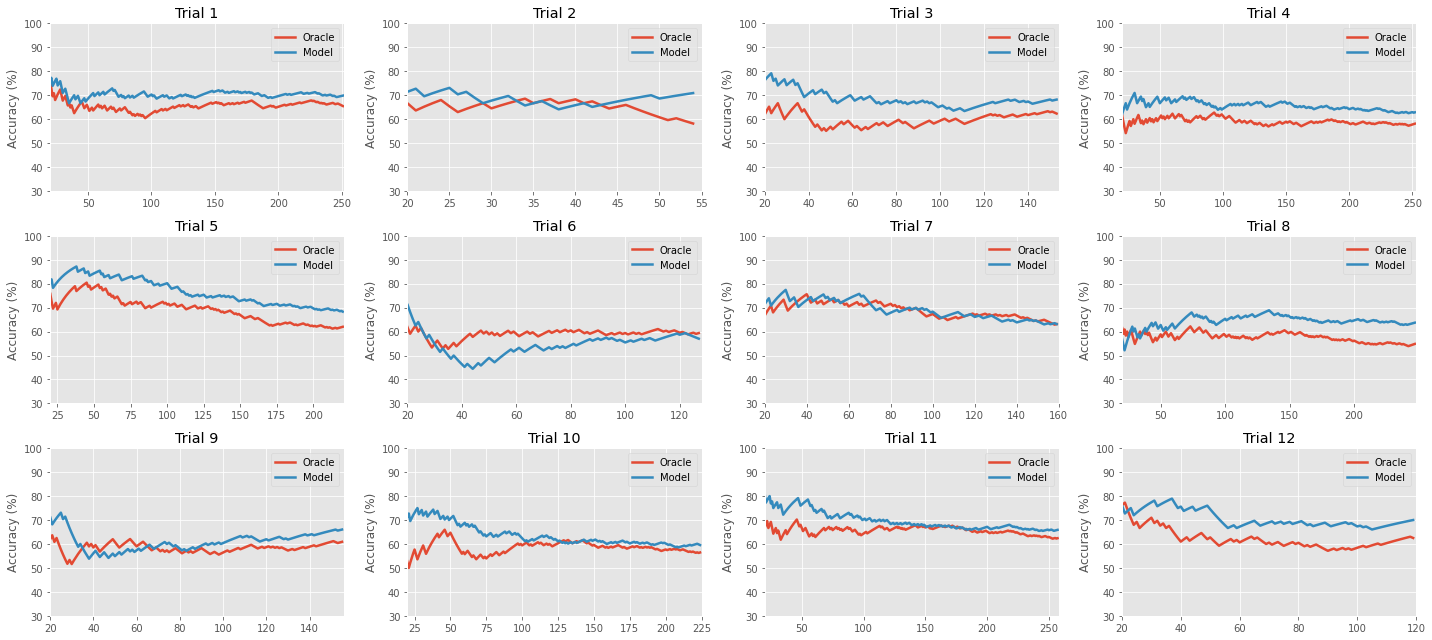

In [13]:
plot(test_trials, test_trials_pupil, window_size, top_pupil_model, cutoff=True)

### Delay + Pupil

In [14]:
models = []
parameters = []
accuracies = []
t_accuracies3 = []

for _ in range(50):
    model_name, params, accuracy, trial_accuracies = train_fixed(
        train_trials, eval_trials, test_trials, 
        input_size=3, random='all', logging=False
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)
    t_accuracies3.append(trial_accuracies)

top_all_model, top_all_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_all_acc)

[(63.22479586743126,
  {'batch_size': 125,
   'hidden_size': 59,
   'input_size': 3,
   'learning_rate': 0.0088,
   'num_epochs': 6,
   'num_stacked_layers': 4,
   'segment_length': 13}),
 (63.51621840837486,
  {'batch_size': 115,
   'hidden_size': 61,
   'input_size': 3,
   'learning_rate': 0.0089,
   'num_epochs': 6,
   'num_stacked_layers': 3,
   'segment_length': 9}),
 (63.613939536932044,
  {'batch_size': 132,
   'hidden_size': 45,
   'input_size': 3,
   'learning_rate': 0.0032,
   'num_epochs': 6,
   'num_stacked_layers': 2,
   'segment_length': 12}),
 (63.6386866400065,
  {'batch_size': 126,
   'hidden_size': 56,
   'input_size': 3,
   'learning_rate': 0.0071,
   'num_epochs': 5,
   'num_stacked_layers': 4,
   'segment_length': 10}),
 (63.685636389730966,
  {'batch_size': 116,
   'hidden_size': 62,
   'input_size': 3,
   'learning_rate': 0.0256,
   'num_epochs': 7,
   'num_stacked_layers': 2,
   'segment_length': 12}),
 (64.19719249755627,
  {'batch_size': 114,
   'hidden_size':

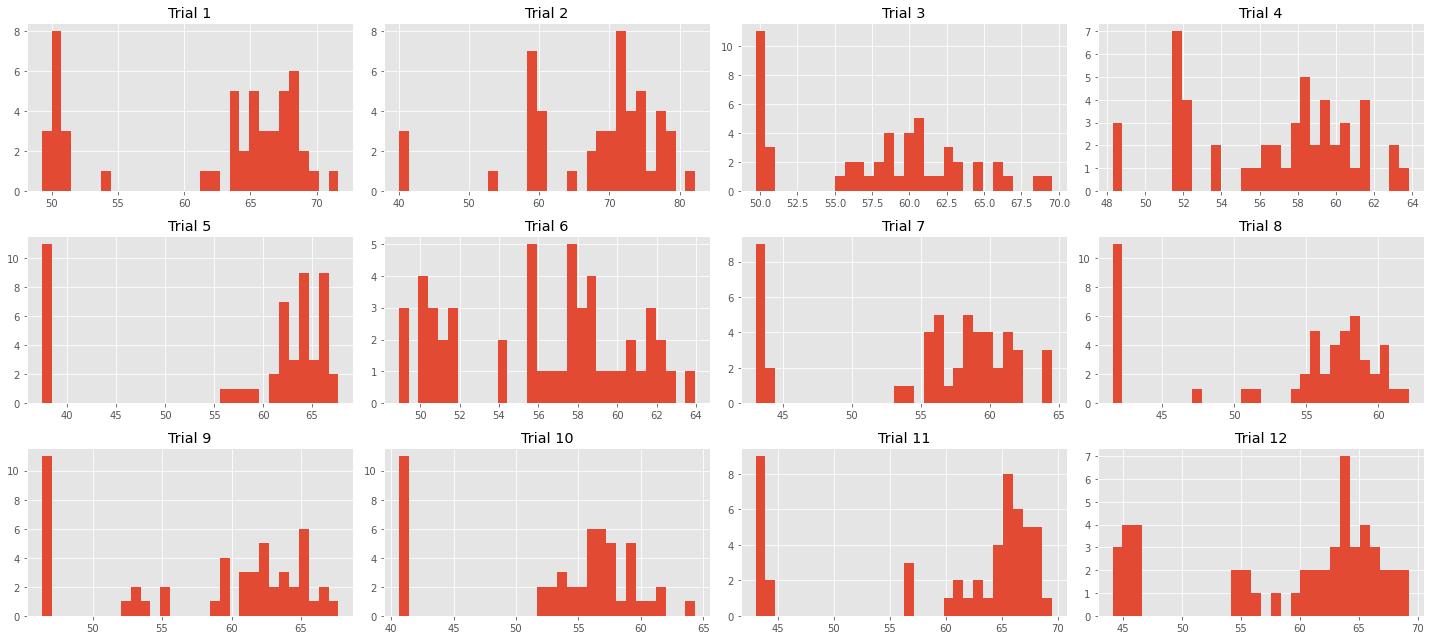

In [15]:
accs3 = np.array(t_accuracies3)

fig, axes = plt.subplots(3, 4, figsize=(20, 9))
axes = axes.flatten()  # Flatten the 2D array of axes

for i in range(12):
    axes[i].hist(accs3[:, i], bins=30)
    axes[i].set_title(f'Trial {i+1}')

plt.tight_layout()
plt.show()

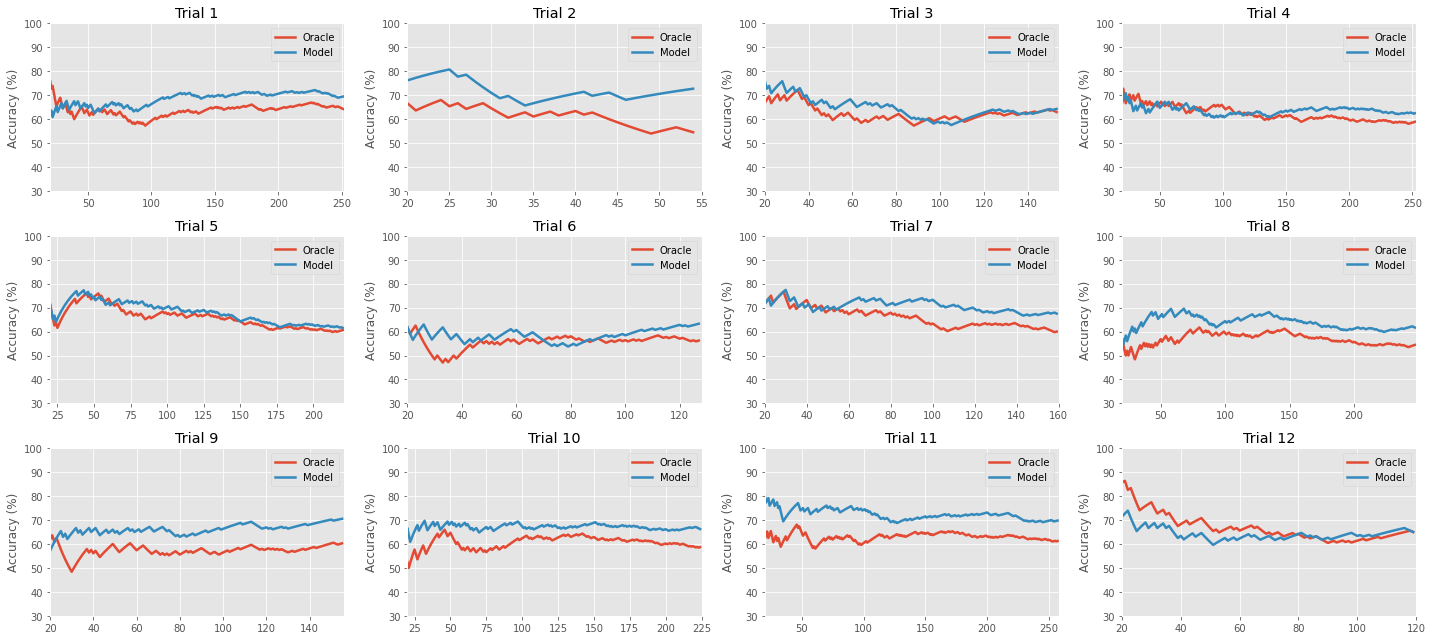

In [15]:
plot(test_trials, test_trials, window_size, top_all_model, cutoff=True)

### Plotting

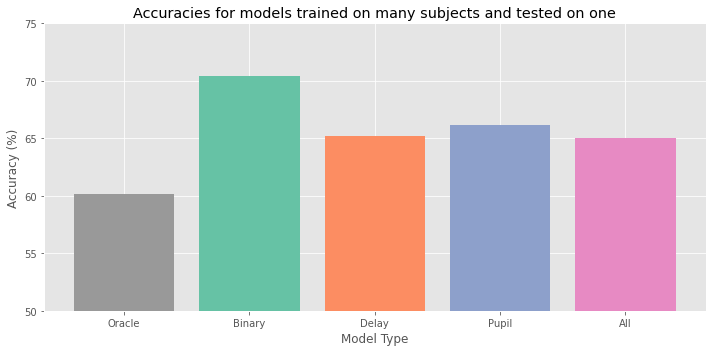

In [17]:
# use oracle accuracy and model accuracies to plot one bar chart of the results

plt.figure(figsize=(10, 5))
colors = ['#999999', '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
plt.bar(['Oracle', 'Binary', 'Delay', 'Pupil', 'All'], [oracle_accuracy, *model_accuracies], color=colors)
plt.title('Accuracies for models trained on many subjects and tested on one')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model Type')
plt.ylim(50, 75)
plt.tight_layout()
plt.savefig('plots/eric.png')
plt.show()